**Thí nghiệm các tham số đột biến:**

- Crossover rate = 0.8

- Mutation rate = 0.04

In [ ]:
import random
import matplotlib.pyplot as plt
import pandas as pd  # Import pandas

In [ ]:
POPULATION_SIZE = 200  # Kích thước quần thể
GENERATIONS = 200  # Số thế hệ

In [ ]:
items = []  # Vật phẩm chứa weights và values
max_capacity = 0  # Maximum capacity
fitness_history = []  # Danh sách lưu trữ giá trị fitness của các cá thể tốt nhất qua từng thế hệ.

In [ ]:
def get_user_input():
    global items, max_capacity, CROSSOVER_RATE, MUTATION_RATE

    # Nhập danh sách vật phẩm và sức chứa
    weights_str = input("Nhập danh sách trọng lượng (phân tách bằng dấu phẩy): ")
    values_str = input("Nhập danh sách giá trị (phân tách bằng dấu phẩy): ")
    max_capacity = int(input("Nhập sức chứa tối đa: "))

    # Nhập tỷ lệ lai ghép và đột biến
    CROSSOVER_RATE = float(input("Nhập tỷ lệ lai ghép (giá trị từ 0 đến 1): "))
    MUTATION_RATE = float(input("Nhập tỷ lệ đột biến (giá trị từ 0 đến 1): "))

    # Chuyển đổi đầu vào thành danh sách trọng lượng và giá trị
    weights = list(map(int, weights_str.split(",")))
    values = list(map(int, values_str.split(",")))
    items = list(zip(weights, values))

    return items, max_capacity, CROSSOVER_RATE, MUTATION_RATE


def get_info():
    print("\nThông tin bài toán:\n")
    stt = 1
    for weight, value in items:
        print(f"Vật phẩm {stt}: Weight = {weight}, Value = {value}")
        stt += 1
    print(f"\nMaximum capacity = {max_capacity}")
    print(f"Crossover rate = {CROSSOVER_RATE}")
    print(f"Mutation rate = {MUTATION_RATE}")


def fitness(individual):
    total_weight = sum(individual[i] * items[i][0] for i in range(len(items)))
    total_value = sum(individual[i] * items[i][1] for i in range(len(items)))
    return total_value if total_weight <= max_capacity else 0


def initialize_population(num_items):
    return [[random.randint(0, 1) for _ in range(num_items)] for _ in range(POPULATION_SIZE)]


def select_population(population):
    sorted_population = sorted(population, key=lambda x: fitness(x), reverse=True)
    return sorted_population[:POPULATION_SIZE]


def crossover(parent1, parent2):
    child1, child2 = parent1[:], parent2[:]
    for i in range(len(parent1)):
        coin_flip = random.choice([0, 1])
        if coin_flip == 0:
            child1[i] = parent1[i]
            child2[i] = parent2[i]
        else:
            child1[i] = parent2[i]
            child2[i] = parent1[i]
    return child1, child2


def mutate(individual):
    for i in range(len(individual)):
        if random.random() < MUTATION_RATE:
            individual[i] = 1 - individual[i]
    return individual


def genetic_algorithm():
    global fitness_history

    # Khởi tạo quần thể
    population = initialize_population(len(items))
    best_individual = max(population, key=lambda ind: fitness(ind))

    # DataFrame để lưu lịch sử fitness và chromosome
    fitness_df = pd.DataFrame(columns=["Generation", "Chromosome", "Best_Fitness", "Mean_Fitness"])

    best_fitness_history = []  # Lưu trữ fitness tốt nhất
    mean_fitness_history = []  # Lưu trữ fitness trung bình

    for gen in range(GENERATIONS):
        # Chọn lọc quần thể
        selected_population = select_population(population)

        # Tạo danh sách offspring thông qua crossover
        num_to_crossover = int(POPULATION_SIZE * CROSSOVER_RATE)
        selected_for_crossover = selected_population[:num_to_crossover]

        offspring = []
        for i in range(0, len(selected_for_crossover), 2):
            if i + 1 < len(selected_for_crossover):  # Đảm bảo cặp cha mẹ hợp lệ
                child1, child2 = crossover(selected_for_crossover[i], selected_for_crossover[i + 1])
                offspring.extend([child1, child2])

        # Đột biến offspring
        offspring = [mutate(ind) for ind in offspring]

        # Thêm offspring vào quần thể và sắp xếp dựa trên fitness
        population.extend(offspring)
        population = sorted(population, key=lambda ind: fitness(ind), reverse=True)
        population = population[:POPULATION_SIZE]

        # Lấy cá thể tốt nhất và tính fitness
        current_best = max(population, key=lambda ind: fitness(ind))
        best_fitness = fitness(current_best)
        best_fitness_history.append(best_fitness)

        # Tính fitness trung bình
        mean_fitness = sum(fitness(ind) for ind in population) / len(population)
        mean_fitness_history.append(mean_fitness)

        # Cập nhật DataFrame lịch sử
        new_row = pd.DataFrame([{
            "Generation": gen + 1,
            "Chromosome": current_best,  # Lưu Chromosome
            "Best_Fitness": best_fitness,
            "Mean_Fitness": mean_fitness
        }])
        fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)

        # Cập nhật cá thể tốt nhất
        if best_fitness > fitness(best_individual):
            best_individual = current_best

    return best_individual, fitness(best_individual), best_fitness_history, mean_fitness_history, fitness_df



**Test Case 5:**

- weights = [879, 3946, 3736, 2324, 2104, 1971, 3252, 3712, 2493, 2780, 1350, 1463, 3868, 2466, 191, 1960, 2347, 343, 2348, 2902, 2840, 3047, 77, 2390, 1454, 153, 3741, 1872, 370, 3658, 2525, 1488, 261, 1755, 899, 3782, 1147, 455, 3858, 2640, 2493]

- values = [3083, 836, 3615, 3391, 1409, 3999, 1829, 1216, 3220, 278, 774, 3602, 158, 761, 3771, 288, 797, 1953, 3947, 2882, 3993, 3179, 1353, 654, 3481, 3914, 543, 709, 2035, 3998, 2837, 2678, 456, 691, 2941, 800, 1804, 2817, 3910, 2594, 953]

- items = 41

- Best fitness = 79009

- Max Capacity = 50000

In [ ]:
000# Main Program
items, max_capacity, CROSSOVER_RATE, MUTATION_RATE = get_user_input()
get_info()

Nhập danh sách trọng lượng (phân tách bằng dấu phẩy): 879, 3946, 3736, 2324, 2104, 1971, 3252, 3712, 2493, 2780, 1350, 1463, 3868, 2466, 191, 1960, 2347, 343, 2348, 2902, 2840, 3047, 77, 2390, 1454, 153, 3741, 1872, 370, 3658, 2525, 1488, 261, 1755, 899, 3782, 1147, 455, 3858, 2640, 2493
Nhập danh sách giá trị (phân tách bằng dấu phẩy): 3083, 836, 3615, 3391, 1409, 3999, 1829, 1216, 3220, 278, 774, 3602, 158, 761, 3771, 288, 797, 1953, 3947, 2882, 3993, 3179, 1353, 654, 3481, 3914, 543, 709, 2035, 3998, 2837, 2678, 456, 691, 2941, 800, 1804, 2817, 3910, 2594, 953
Nhập sức chứa tối đa: 50000
Nhập tỷ lệ lai ghép (giá trị từ 0 đến 1): 0.8
Nhập tỷ lệ đột biến (giá trị từ 0 đến 1): 0.04

Thông tin bài toán:

Vật phẩm 1: Weight = 879, Value = 3083
Vật phẩm 2: Weight = 3946, Value = 836
Vật phẩm 3: Weight = 3736, Value = 3615
Vật phẩm 4: Weight = 2324, Value = 3391
Vật phẩm 5: Weight = 2104, Value = 1409
Vật phẩm 6: Weight = 1971, Value = 3999
Vật phẩm 7: Weight = 3252, Value = 1829
Vật phẩm 

**Chạy thuật toán 100 lần để thống kê kết quả:**

In [ ]:
import pandas as pd

# Hàm chạy nhiều lần và thống kê
def run_multiple_times(n_runs=100):
    correct_count = 0
    incorrect_count = 0

    # Lưu trữ kết quả của tất cả lần chạy
    results = []

    for i in range(n_runs):
        print(f"Run {i+1}/{n_runs}")
        best_solution, best_fitness, best_fitness_history, mean_fitness_history, fitness_df = genetic_algorithm()

        # Kiểm tra điều kiện best fitness
        is_correct = best_fitness == 79009
        if is_correct:
            correct_count += 1
        else:
            incorrect_count += 1

        # Lưu kết quả của lần chạy
        results.append({
            "Run": i + 1,
            "Best_Solution": best_solution,
            "Best_Fitness": best_fitness,
            "Is_Correct": is_correct,
            "Fitness_History": best_fitness_history,
            "Mean_Fitness_History": mean_fitness_history,
            "Fitness_DF": fitness_df
        })

        # In kết quả của từng lần chạy
        print(f"Run {i+1}: Best Fitness = {best_fitness} {'[Correct]' if is_correct else '[Incorrect]'}")

    # Thống kê kết quả
    print("\nTổng kết:")
    print(f"Số lần đúng: {correct_count}")
    print(f"Số lần sai: {incorrect_count}")
    print(f"Tỷ lệ đúng: {correct_count / n_runs * 100:.2f}%")
    print(f"Tỷ lệ sai: {incorrect_count / n_runs * 100:.2f}%")

    # Trả về kết quả
    results_df = pd.DataFrame(results)
    return results_df

# Gọi hàm chạy nhiều lần
results_df = run_multiple_times()

# Phân tích hoặc xem kết quả
results_df.head()


Run 1/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 1: Best Fitness = 79009 [Correct]
Run 2/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 2: Best Fitness = 79009 [Correct]
Run 3/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 3: Best Fitness = 79009 [Correct]
Run 4/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 4: Best Fitness = 79009 [Correct]
Run 5/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 5: Best Fitness = 78691 [Incorrect]
Run 6/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 6: Best Fitness = 78765 [Incorrect]
Run 7/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 7: Best Fitness = 79009 [Correct]
Run 8/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 8: Best Fitness = 79009 [Correct]
Run 9/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 9: Best Fitness = 79009 [Correct]
Run 10/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 10: Best Fitness = 79009 [Correct]
Run 11/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 11: Best Fitness = 79009 [Correct]
Run 12/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 12: Best Fitness = 79009 [Correct]
Run 13/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 13: Best Fitness = 79009 [Correct]
Run 14/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 14: Best Fitness = 79009 [Correct]
Run 15/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 15: Best Fitness = 79009 [Correct]
Run 16/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 16: Best Fitness = 79009 [Correct]
Run 17/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 17: Best Fitness = 79009 [Correct]
Run 18/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 18: Best Fitness = 79009 [Correct]
Run 19/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 19: Best Fitness = 79009 [Correct]
Run 20/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 20: Best Fitness = 79009 [Correct]
Run 21/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 21: Best Fitness = 79009 [Correct]
Run 22/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 22: Best Fitness = 79009 [Correct]
Run 23/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 23: Best Fitness = 79009 [Correct]
Run 24/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 24: Best Fitness = 79009 [Correct]
Run 25/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 25: Best Fitness = 79009 [Correct]
Run 26/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 26: Best Fitness = 78765 [Incorrect]
Run 27/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 27: Best Fitness = 79009 [Correct]
Run 28/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 28: Best Fitness = 79009 [Correct]
Run 29/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 29: Best Fitness = 78765 [Incorrect]
Run 30/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 30: Best Fitness = 79009 [Correct]
Run 31/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 31: Best Fitness = 79009 [Correct]
Run 32/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 32: Best Fitness = 79009 [Correct]
Run 33/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 33: Best Fitness = 79009 [Correct]
Run 34/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 34: Best Fitness = 79009 [Correct]
Run 35/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 35: Best Fitness = 79009 [Correct]
Run 36/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 36: Best Fitness = 79009 [Correct]
Run 37/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 37: Best Fitness = 79009 [Correct]
Run 38/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 38: Best Fitness = 79009 [Correct]
Run 39/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 39: Best Fitness = 78589 [Incorrect]
Run 40/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 40: Best Fitness = 79009 [Correct]
Run 41/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 41: Best Fitness = 79009 [Correct]
Run 42/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 42: Best Fitness = 79009 [Correct]
Run 43/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 43: Best Fitness = 79009 [Correct]
Run 44/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 44: Best Fitness = 79009 [Correct]
Run 45/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 45: Best Fitness = 79009 [Correct]
Run 46/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 46: Best Fitness = 79009 [Correct]
Run 47/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 47: Best Fitness = 79009 [Correct]
Run 48/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 48: Best Fitness = 79009 [Correct]
Run 49/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 49: Best Fitness = 79009 [Correct]
Run 50/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 50: Best Fitness = 79009 [Correct]
Run 51/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 51: Best Fitness = 79009 [Correct]
Run 52/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 52: Best Fitness = 79009 [Correct]
Run 53/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 53: Best Fitness = 79009 [Correct]
Run 54/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 54: Best Fitness = 79009 [Correct]
Run 55/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 55: Best Fitness = 79009 [Correct]
Run 56/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 56: Best Fitness = 79009 [Correct]
Run 57/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 57: Best Fitness = 79009 [Correct]
Run 58/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 58: Best Fitness = 79009 [Correct]
Run 59/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 59: Best Fitness = 79009 [Correct]
Run 60/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 60: Best Fitness = 79009 [Correct]
Run 61/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 61: Best Fitness = 79009 [Correct]
Run 62/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 62: Best Fitness = 78765 [Incorrect]
Run 63/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 63: Best Fitness = 78765 [Incorrect]
Run 64/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 64: Best Fitness = 79009 [Correct]
Run 65/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 65: Best Fitness = 78765 [Incorrect]
Run 66/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 66: Best Fitness = 79009 [Correct]
Run 67/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 67: Best Fitness = 79009 [Correct]
Run 68/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 68: Best Fitness = 79009 [Correct]
Run 69/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 69: Best Fitness = 79009 [Correct]
Run 70/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 70: Best Fitness = 78765 [Incorrect]
Run 71/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 71: Best Fitness = 79009 [Correct]
Run 72/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 72: Best Fitness = 79009 [Correct]
Run 73/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 73: Best Fitness = 78765 [Incorrect]
Run 74/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 74: Best Fitness = 79009 [Correct]
Run 75/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 75: Best Fitness = 78765 [Incorrect]
Run 76/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 76: Best Fitness = 79009 [Correct]
Run 77/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 77: Best Fitness = 79009 [Correct]
Run 78/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 78: Best Fitness = 79009 [Correct]
Run 79/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 79: Best Fitness = 79009 [Correct]
Run 80/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 80: Best Fitness = 79009 [Correct]
Run 81/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 81: Best Fitness = 78765 [Incorrect]
Run 82/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 82: Best Fitness = 79009 [Correct]
Run 83/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 83: Best Fitness = 79009 [Correct]
Run 84/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 84: Best Fitness = 79009 [Correct]
Run 85/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 85: Best Fitness = 79009 [Correct]
Run 86/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 86: Best Fitness = 79009 [Correct]
Run 87/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 87: Best Fitness = 79009 [Correct]
Run 88/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 88: Best Fitness = 79009 [Correct]
Run 89/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 89: Best Fitness = 78589 [Incorrect]
Run 90/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 90: Best Fitness = 78765 [Incorrect]
Run 91/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 91: Best Fitness = 78765 [Incorrect]
Run 92/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 92: Best Fitness = 79009 [Correct]
Run 93/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 93: Best Fitness = 79009 [Correct]
Run 94/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 94: Best Fitness = 78765 [Incorrect]
Run 95/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 95: Best Fitness = 79009 [Correct]
Run 96/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 96: Best Fitness = 79009 [Correct]
Run 97/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 97: Best Fitness = 79009 [Correct]
Run 98/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 98: Best Fitness = 78765 [Incorrect]
Run 99/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 99: Best Fitness = 79009 [Correct]
Run 100/100


<ipython-input-4-df9a58c0fb4c>:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)


Run 100: Best Fitness = 79009 [Correct]

Tổng kết:
Số lần đúng: 83
Số lần sai: 17
Tỷ lệ đúng: 83.00%
Tỷ lệ sai: 17.00%


,Run,Best_Solution,Best_Fitness,Is_Correct,Fitness_History,Mean_Fitness_History,Fitness_DF
0,1,"[1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, ...",79009,True,"[64339, 64339, 66587, 66587, 66587, 68341, 706...","[45715.115, 49278.15, 52379.935, 54501.21, 570...",Generation ...
1,2,"[1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, ...",79009,True,"[61459, 64278, 66396, 67807, 68448, 69889, 714...","[45744.24, 49275.815, 52080.235, 54892.805, 57...",Generation ...
2,3,"[1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, ...",79009,True,"[59492, 67144, 67144, 67166, 67866, 69518, 695...","[46156.845, 50192.015, 52922.23, 55708.01, 578...",Generation ...
3,4,"[1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, ...",79009,True,"[62570, 64892, 64892, 65300, 66359, 72355, 723...","[45002.295, 48576.85, 51553.625, 54050.265, 55...",Generation ...
4,5,"[1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, ...",78691,False,"[60084, 63131, 67791, 67791, 68614, 68614, 695...","[45661.305, 48705.865, 51553.305, 53931.98, 55...",Generation ...


**Phân tích kết quả sai:**

**Sử dụng Mean Fitness để đánh giá hiệu suất:**

Việc sử dụng **Mean Fitness** (fitness trung bình) để đánh giá hiệu suất của thuật toán di truyền (genetic algorithm) có ý nghĩa quan trọng trong việc theo dõi quá trình tiến hóa của quần thể qua các thế hệ như:

**1. Đo lường sự tiến bộ của toàn bộ quần thể:**

- Sự tăng Mean Fitness cho thấy quần thể đang phát triển theo hướng tốt hơn, và các giải pháp kém dần bị loại bỏ.

**2. Phát hiện hiện tượng hội tụ (Convergence):**

- Khi Mean Fitness tiến gần đến Best Fitness (đường màu xanh dương), điều này báo hiệu rằng:
Hầu hết các cá thể trong quần thể đang đạt đến một mức độ chất lượng tương tự.
Điều này là dấu hiệu hội tụ của thuật toán.
- Nếu Mean Fitness không tăng hoặc bị "đóng băng" sớm, có thể đây là tín hiệu của việc hội tụ sớm (premature convergence), tức là quần thể bị mắc kẹt tại cực trị địa phương (local optimum).

**3. Theo dõi sự đa dạng của quần thể:**

Khoảng cách giữa Best Fitness và Mean Fitness cho biết mức độ đa dạng của quần thể:

- **Khoảng cách lớn:** Quần thể còn nhiều cá thể kém hơn, tức là đa dạng vẫn tồn tại.

- **Khoảng cách nhỏ:** Các cá thể trong quần thể trở nên đồng nhất, và thuật toán có thể đang khai thác (exploitation) thay vì khám phá (exploration).
Nếu khoảng cách này giảm nhanh, đó là tín hiệu cho thấy quần thể có thể đang mất đi sự đa dạng, cần tăng cường đột biến để tạo thêm giải pháp mới.

**4. Hỗ trợ điều chỉnh tham số:**

Mean Fitness cung cấp thông tin quan trọng để tinh chỉnh tham số như:

- Tăng/giảm tỷ lệ đột biến (mutation rate) để duy trì đa dạng khi Mean Fitness và Best Fitness hội tụ quá nhanh.

- Thay đổi tỷ lệ chọn lọc (selection pressure) để cân bằng giữa các cá thể yếu và mạnh, tránh hiện tượng cá thể ưu tú lấn át toàn bộ quần thể (elitism dominance).

**5. Phân tích hiệu năng thuật toán:**

- Khi Mean Fitness tăng đều đặn qua các thế hệ, điều đó chỉ ra rằng thuật toán hoạt động hiệu quả.

Nếu Mean Fitness tăng chậm hoặc dừng lại, có thể cần xem xét lại:

- Thiết kế của hàm đánh giá (fitness function).

- Các toán tử GA (lai ghép, đột biến, chọn lọc).

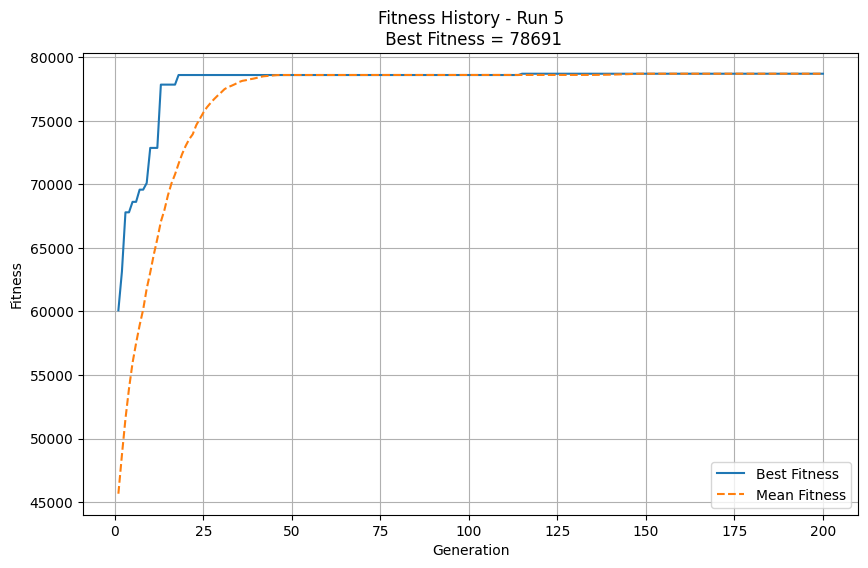

In [ ]:
import matplotlib.pyplot as plt

# Lọc các lần chạy sai
incorrect_runs = results_df[results_df["Is_Correct"] == False]

# Kiểm tra nếu có bất kỳ lần chạy nào sai
if not incorrect_runs.empty:
    # Lấy lần chạy sai đầu tiên
    first_incorrect_run = incorrect_runs.iloc[0]
    run_number = first_incorrect_run["Run"]
    best_fitness_history = first_incorrect_run["Fitness_History"]
    mean_fitness_history = first_incorrect_run["Mean_Fitness_History"]

    # Lấy giá trị best fitness cuối cùng
    final_best_fitness = best_fitness_history[-1]

    # Vẽ biểu đồ fitness qua các thế hệ
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(best_fitness_history) + 1), best_fitness_history, label="Best Fitness")
    plt.plot(range(1, len(mean_fitness_history) + 1), mean_fitness_history, label="Mean Fitness", linestyle="--")

    # Thêm thông tin vào tiêu đề
    plt.title(f"Fitness History - Run {run_number}\n Best Fitness = {final_best_fitness}")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.legend()
    plt.grid()

    # Hiển thị biểu đồ
    plt.show()
else:
    print("Không có lần chạy nào sai.")


**Nhận định:**
- Không đạt được giá trị tối ưu Best Fitness = 78691 (Best Fitness = 79009)
- Khoảng cách giữa Mean Fitness và Best Fitness là trùng nhau là dấu hiệu của thiếu đa dạng quần thể.
- Hội tụ sớm sau thế hệ 25 trở đi.

**Thí nghiệm tương tự các thông số khác và thống kê kết quả:**

| Mutation Rate | Số lần đúng | Số lần sai | Tỷ lệ đúng (%) | Tỷ lệ sai (%) |
|---------------|-------------|------------|----------------|---------------|
| 0.02          | 71          | 29         | 71.00          | 29.00         |
| 0.03          | 80          | 20         | 80.00          | 20.00         |
| 0.04          | 83          | 17         | 83.00          | 17.00         |
| 0.05          | 88          | 12         | 88.00          | 12.00         |


**Qua quan sát thí nghiệm rút ra được:**

**Mutation Rate (0.02-0.04):** sẽ có Performance tương tự nhau càng tăng Muatation Rate càng cải thiện được khả năng ra kết quả đúng:

Best Fitness = 79009


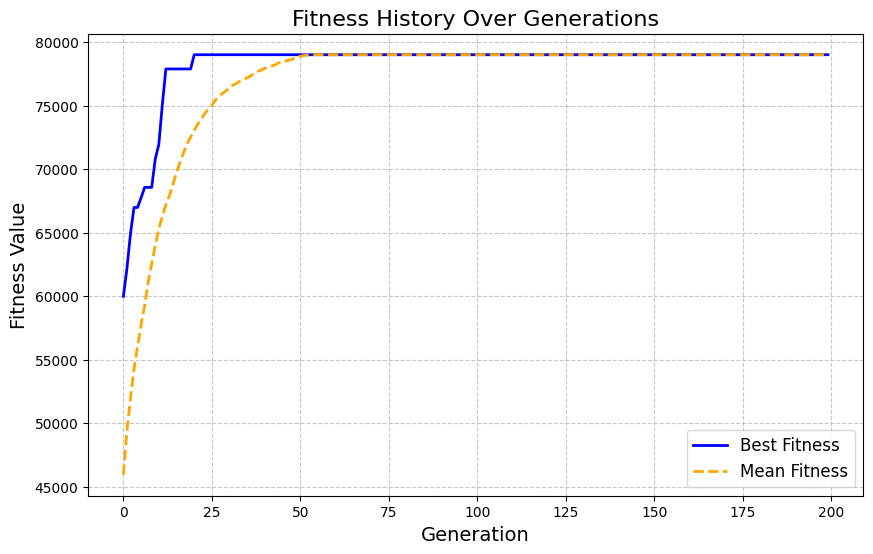

**Mutation Rate (0.05+)**: sẽ cải thiện được kết quả đồng thời cải thiện được độ đa dạng của thuật toán nhưng lại làm chậm đi quá trình hội tụ.

Best Fitness = 79009

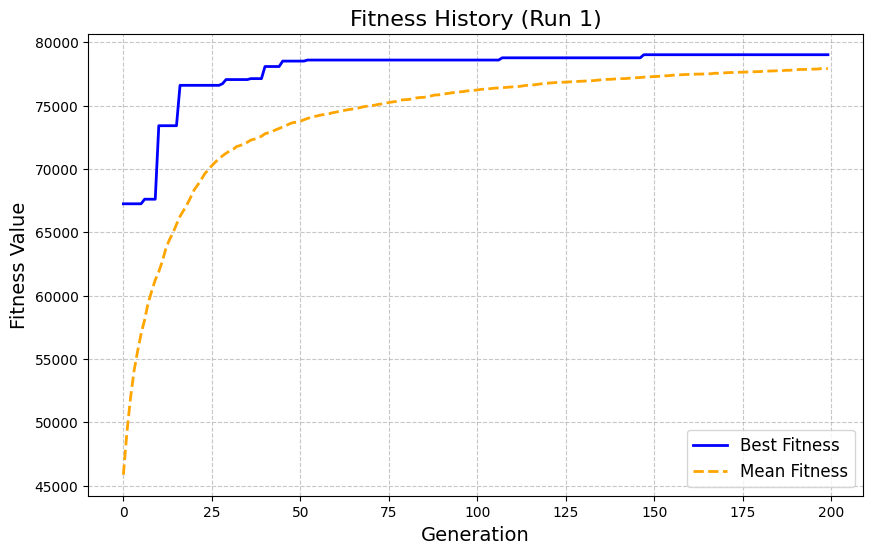

**Kết luận:** Lựa chọn 0.04 là tỉ lệ đột biến sẽ phù hợp với bài toán vì đảm bảo ra được kết quả tốt hơn và hội tụ ổn định hơn mặc dù vẫn còn hạn chế về đa dạng quần thể.